<a href="https://colab.research.google.com/github/l-guilherme/PLN/blob/main/PLN_T1_brazilian_court_decisions_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('joelniklaus/brazilian_court_decisions')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

validation.jsonl:   0%|          | 0.00/852k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/841k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3234 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/404 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/405 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['process_number', 'orgao_julgador', 'publish_date', 'judge_relator', 'ementa_text', 'decision_description', 'judgment_text', 'judgment_label', 'unanimity_text', 'unanimity_label'],
        num_rows: 3234
    })
    validation: Dataset({
        features: ['process_number', 'orgao_julgador', 'publish_date', 'judge_relator', 'ementa_text', 'decision_description', 'judgment_text', 'judgment_label', 'unanimity_text', 'unanimity_label'],
        num_rows: 404
    })
    test: Dataset({
        features: ['process_number', 'orgao_julgador', 'publish_date', 'judge_relator', 'ementa_text', 'decision_description', 'judgment_text', 'judgment_label', 'unanimity_text', 'unanimity_label'],
        num_rows: 405
    })
})

In [ ]:
dataset['train'][0]

{'process_number': '0800304-08.2018.8.02.0000',
 'orgao_julgador': 'Tribunal Pleno',
 'publish_date': '12/03/2019',
 'judge_relator': 'Des. João Luiz Azevedo Lessa',
 'ementa_text': 'DIREITO PENAL E PROCESSUAL PENAL. REVISÃO CRIMINAL. ART. 621 DO CÓDIGO DE PROCESSO PENAL. REQUERENTE CONDENADO EM JÚRI POPULAR PELA PRÁTICA DOS CRIMES DE HOMICÍDIO DUPLAMENTE QUALIFICADO E HOMICÍDIO QUALIFICADO TENTADO. PLEITO DE REFAZIMENTO DA DOSIMETRIA DA PENA IMPOSTA AO REQUERENTE. ADMISSIBILIDADE NA VIA REVISIONAL. PRECEDENTES. ALEGAÇÃO DE ERRO NO PROCESSO DE DOSIMETRIA DA PENA. COMPORTAMENTO DA VÍTIMA. CIRCUNSTÂNCIA JUDICIAL NEUTRA QUE NÃO PODE SER CONSIDERADA DE FORMA DESFAVORÁVEL AO SENTENCIANDO SEGUNDO PRECEDENTES DO SUPERIOR TRIBUNAL DE JUSTIÇA E NOVO ENTENDIMENTO DA CÂMARA CRIMINAL DESTE TRIBUNAL DE JUSTIÇA. AFASTAMENTO. CULPABILIDADE. AUSÊNCIA DE EXPOSIÇÃO DE MOTIVOS PARA O INCREMENTO DA PENA-BASE. AFASTADO O DESVALOR. VALORAÇÃO ATRIBUÍDA ÀS CIRCUNSTÂNCIAS DO CRIME MANTIDA. FUNDAMENTAÇÃO IDÔNEA

In [ ]:
train_texts = dataset['train']['decision_description']
train_labels = dataset['train']['judgment_label']

test_texts = dataset['test']['decision_description']
test_labels = dataset['test']['judgment_label']

print(f'\nTrain size: {len(train_texts)} -- {len(train_labels)}')
print(f'Test size: {len(test_texts)} -- {len(test_labels)}')


Train size: 3234 -- 3234
Test size: 405 -- 405


In [ ]:
from collections import Counter

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({'no': 1960, 'partial': 677, 'yes': 597})
Test Labels Distribution: Counter({'no': 234, 'partial': 93, 'yes': 78})


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train_labels)

train_labels = label_encoder.transform(train_labels)
test_labels = label_encoder.transform(test_labels)

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({0: 1960, 1: 677, 2: 597})
Test Labels Distribution: Counter({0: 234, 1: 93, 2: 78})


In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

from tqdm import tqdm

def preprocess_texts(list_texts):
  nlp = spacy.load('pt_core_news_sm', disable=['ner'])
  new_texts = []
  with tqdm(total=len(list_texts), desc='Preprocessing') as pbar:
    for text in list_texts:
      doc = nlp(text)
      tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT' and not t.is_stop]
      texto_normalizado = ' '.join(tokens)
      new_texts.append(texto_normalizado)
      pbar.update(1)
  return new_texts

In [ ]:
train_texts = preprocess_texts(train_texts)

Preprocessing: 100%|██████████| 3234/3234 [01:58<00:00, 27.21it/s]


In [ ]:
test_texts = preprocess_texts(test_texts)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
Preprocessing: 100%|██████████| 405/405 [00:09<00:00, 44.09it/s]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#vectorizer_option = 'binary'
vectorizer_option = 'count'
#vectorizer_option = 'tf_idf'

vectorizer = None

if vectorizer_option == 'binary':
  vectorizer = CountVectorizer(binary=True, max_features=None, ngram_range=(1, 1))
elif vectorizer_option == 'count':
  ## INCLUIR O VETORIZADOR DE CONTAGEM SIMPLES
  vectorizer = CountVectorizer(binary=False, max_features=None, ngram_range=(1, 1))
elif vectorizer_option == 'tf_idf':
  ## INCLUIR O VETORIZADOR USANDO TF-IDF
  vectorizer = TfidfVectorizer(binary=False, max_features=None, ngram_range=(1, 1))

print(f'Vectorizer Option: {vectorizer_option}')

Vectorizer Option: count


In [ ]:
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()

print(f'\nExample Raw Text: {train_texts[0]}')
print(f'\nExample Vectorized Text: {X_train[0]}')


Example Raw Text: direito penal processual penal revisão criminal artigo 621 código processo penal requerente condenado júri popular prática crimes homicídio duplamente qualificado homicídio qualificado tentado pleito refazimento dosimetria pena imposta requerente admissibilidade via revisional precedentes alegação erro processo dosimetria pena comportamento vítima circunstância judicial neutra considerada desfavorável sentenciando precedentes superior tribunal justiça entendimento câmara criminal tribunal justiça afastamento culpabilidade ausência exposição motivos incremento pena-base afastado desvalor valoração atribuída circunstâncias crime mantida fundamentação idônea pena-base reduzida compensação agravante motivação torpe atenuante confissão espontânea pena privativa liberdade redimensionada crime tentado aplicada fração redutora máxima ante distância atos praticados requerente consumação crime pena redimensionada

Example Vectorized Text: [0 0 0 ... 0 0 0]


In [ ]:
print(f'Vocabulary: {len(vectorizer.vocabulary_)}')

Vocabulary: 12447


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',
                                              max_iter=100),
    'Multinomial NB': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    # INCLUIR MAIS 7 NOVOS ALGORITMOS.
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'MLP': MLPClassifier(),
    'SGD': SGDClassifier(class_weight='balanced')
}


Classifier: Logistic Regression
{'0': {'precision': 0.8347826086956521, 'recall': 0.8205128205128205, 'f1-score': 0.8275862068965517, 'support': 234.0}, '1': {'precision': 0.5979381443298969, 'recall': 0.6236559139784946, 'f1-score': 0.6105263157894737, 'support': 93.0}, '2': {'precision': 0.6410256410256411, 'recall': 0.6410256410256411, 'f1-score': 0.6410256410256411, 'support': 78.0}, 'accuracy': 0.7407407407407407, 'macro avg': {'precision': 0.6912487980170634, 'recall': 0.6950647918389854, 'f1-score': 0.6930460545705555, 'support': 405.0}, 'weighted avg': {'precision': 0.7430799453270692, 'recall': 0.7407407407407407, 'f1-score': 0.7418126414375659, 'support': 405.0}}


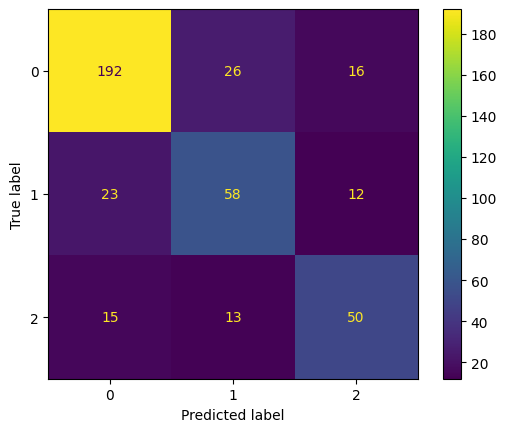


Classifier: Multinomial NB
{'0': {'precision': 0.7821229050279329, 'recall': 0.5982905982905983, 'f1-score': 0.6779661016949152, 'support': 234.0}, '1': {'precision': 0.4596774193548387, 'recall': 0.6129032258064516, 'f1-score': 0.5253456221198156, 'support': 93.0}, '2': {'precision': 0.45098039215686275, 'recall': 0.5897435897435898, 'f1-score': 0.5111111111111111, 'support': 78.0}, 'accuracy': 0.6, 'macro avg': {'precision': 0.5642602388465447, 'recall': 0.6003124712802133, 'f1-score': 0.571474278308614, 'support': 405.0}, 'weighted avg': {'precision': 0.6443042725056088, 'recall': 0.6, 'f1-score': 0.6107848822726412, 'support': 405.0}}


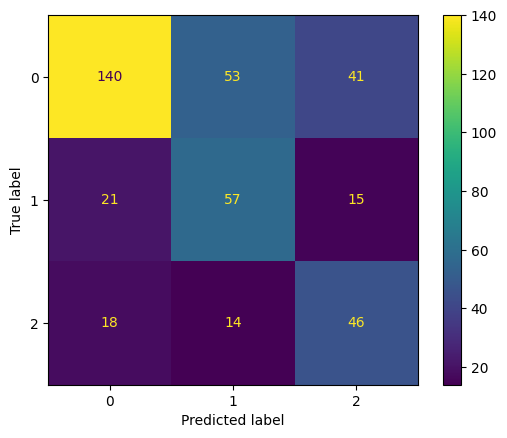


Classifier: KNN
{'0': {'precision': 0.6710963455149501, 'recall': 0.8632478632478633, 'f1-score': 0.7551401869158878, 'support': 234.0}, '1': {'precision': 0.6140350877192983, 'recall': 0.3763440860215054, 'f1-score': 0.4666666666666667, 'support': 93.0}, '2': {'precision': 0.425531914893617, 'recall': 0.2564102564102564, 'f1-score': 0.32, 'support': 78.0}, 'accuracy': 0.6345679012345679, 'macro avg': {'precision': 0.5702211160426217, 'recall': 0.4986674018932084, 'f1-score': 0.5139356178608515, 'support': 405.0}, 'weighted avg': {'precision': 0.6106994996792474, 'recall': 0.6345679012345679, 'f1-score': 0.6050933425637476, 'support': 405.0}}


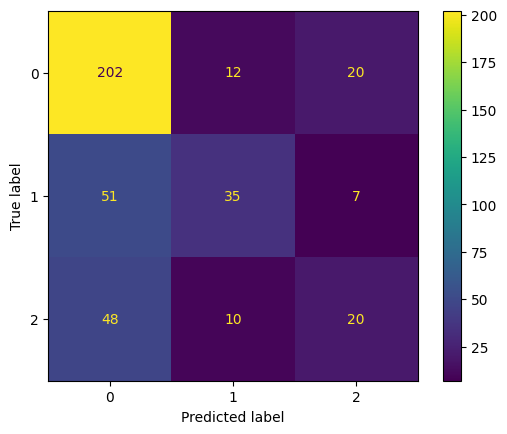


Classifier: Random Forest
{'0': {'precision': 0.7038216560509554, 'recall': 0.9444444444444444, 'f1-score': 0.8065693430656934, 'support': 234.0}, '1': {'precision': 0.7692307692307693, 'recall': 0.43010752688172044, 'f1-score': 0.5517241379310345, 'support': 93.0}, '2': {'precision': 0.7692307692307693, 'recall': 0.38461538461538464, 'f1-score': 0.5128205128205128, 'support': 78.0}, 'accuracy': 0.7185185185185186, 'macro avg': {'precision': 0.7474277315041645, 'recall': 0.5863891186471831, 'f1-score': 0.6237046646057469, 'support': 405.0}, 'weighted avg': {'precision': 0.7314388371713213, 'recall': 0.7185185185185186, 'f1-score': 0.691475484209774, 'support': 405.0}}


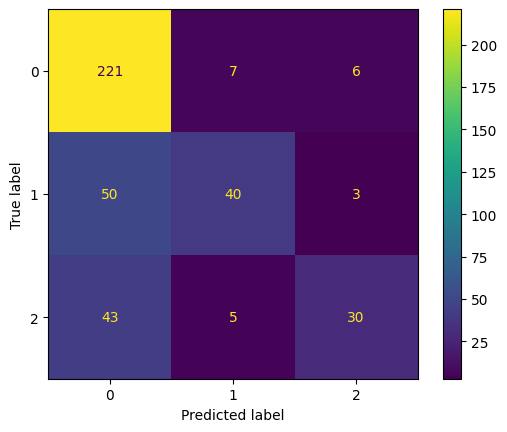


Classifier: AdaBoost
{'0': {'precision': 0.6384839650145773, 'recall': 0.9358974358974359, 'f1-score': 0.7590987868284229, 'support': 234.0}, '1': {'precision': 0.6486486486486487, 'recall': 0.25806451612903225, 'f1-score': 0.36923076923076925, 'support': 93.0}, '2': {'precision': 0.64, 'recall': 0.20512820512820512, 'f1-score': 0.3106796116504854, 'support': 78.0}, 'accuracy': 0.6395061728395062, 'macro avg': {'precision': 0.642377537887742, 'recall': 0.4663633857182244, 'f1-score': 0.47966972256989254, 'support': 405.0}, 'weighted avg': {'precision': 0.6411100546610751, 'recall': 0.6395061728395062, 'f1-score': 0.5832113268272848, 'support': 405.0}}


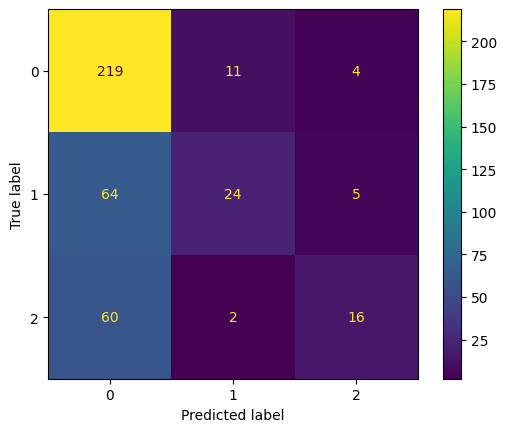


Classifier: Gradient Boosting
{'0': {'precision': 0.7203947368421053, 'recall': 0.9358974358974359, 'f1-score': 0.8141263940520446, 'support': 234.0}, '1': {'precision': 0.7142857142857143, 'recall': 0.4838709677419355, 'f1-score': 0.5769230769230769, 'support': 93.0}, '2': {'precision': 0.6842105263157895, 'recall': 0.3333333333333333, 'f1-score': 0.4482758620689655, 'support': 78.0}, 'accuracy': 0.7160493827160493, 'macro avg': {'precision': 0.706296992481203, 'recall': 0.5843672456575683, 'f1-score': 0.6131084443480289, 'support': 405.0}, 'weighted avg': {'precision': 0.7120231133389028, 'recall': 0.7160493827160493, 'f1-score': 0.6891973817367998, 'support': 405.0}}


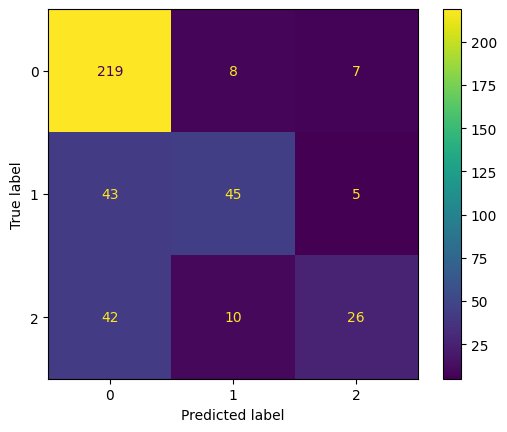


Classifier: SVM
{'0': {'precision': 0.8207547169811321, 'recall': 0.7435897435897436, 'f1-score': 0.7802690582959642, 'support': 234.0}, '1': {'precision': 0.6, 'recall': 0.6451612903225806, 'f1-score': 0.6217616580310881, 'support': 93.0}, '2': {'precision': 0.5698924731182796, 'recall': 0.6794871794871795, 'f1-score': 0.6198830409356725, 'support': 78.0}, 'accuracy': 0.7086419753086419, 'macro avg': {'precision': 0.6635490633664706, 'recall': 0.6894127377998345, 'f1-score': 0.6739712524209082, 'support': 405.0}, 'weighted avg': {'precision': 0.7217486831526191, 'recall': 0.7086419753086419, 'f1-score': 0.7129819037805661, 'support': 405.0}}


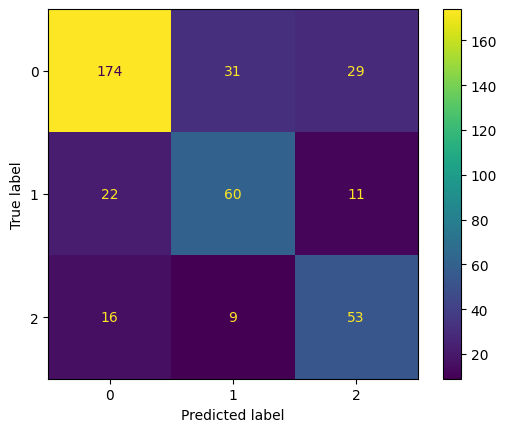


Classifier: Decision Tree
{'0': {'precision': 0.8018018018018018, 'recall': 0.7606837606837606, 'f1-score': 0.7807017543859649, 'support': 234.0}, '1': {'precision': 0.5294117647058824, 'recall': 0.5806451612903226, 'f1-score': 0.5538461538461539, 'support': 93.0}, '2': {'precision': 0.5432098765432098, 'recall': 0.5641025641025641, 'f1-score': 0.5534591194968553, 'support': 78.0}, 'accuracy': 0.6814814814814815, 'macro avg': {'precision': 0.6248078143502981, 'recall': 0.6351438286922158, 'f1-score': 0.6293356759096581, 'support': 405.0}, 'weighted avg': {'precision': 0.6894500891596026, 'recall': 0.6814814814814815, 'f1-score': 0.6848437386537354, 'support': 405.0}}


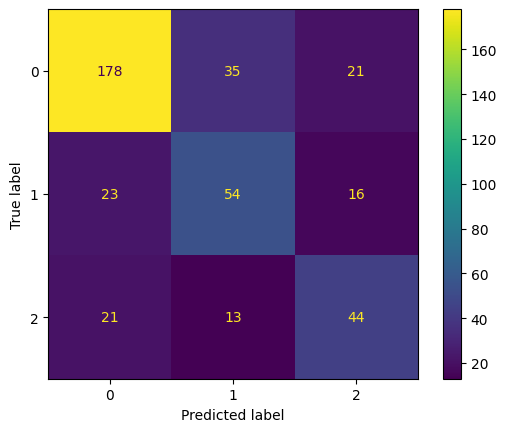


Classifier: MLP
{'0': {'precision': 0.8149606299212598, 'recall': 0.8846153846153846, 'f1-score': 0.8483606557377049, 'support': 234.0}, '1': {'precision': 0.6813186813186813, 'recall': 0.6666666666666666, 'f1-score': 0.6739130434782609, 'support': 93.0}, '2': {'precision': 0.6666666666666666, 'recall': 0.5128205128205128, 'f1-score': 0.5797101449275363, 'support': 78.0}, 'accuracy': 0.762962962962963, 'macro avg': {'precision': 0.720981992635536, 'recall': 0.6880341880341879, 'f1-score': 0.7006612813811673, 'support': 405.0}, 'weighted avg': {'precision': 0.755712159911635, 'recall': 0.762962962962963, 'f1-score': 0.7565622167665409, 'support': 405.0}}


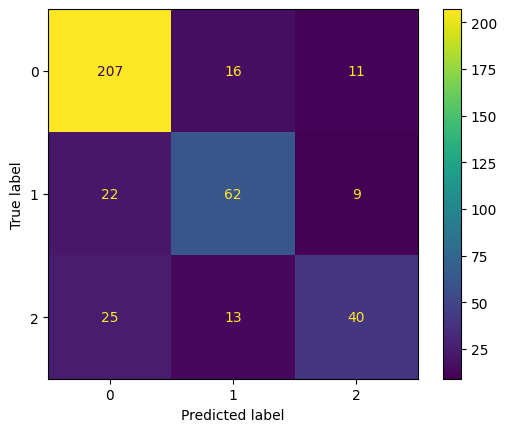


Classifier: SGD
{'0': {'precision': 0.8109243697478992, 'recall': 0.8247863247863247, 'f1-score': 0.8177966101694916, 'support': 234.0}, '1': {'precision': 0.6041666666666666, 'recall': 0.6236559139784946, 'f1-score': 0.6137566137566137, 'support': 93.0}, '2': {'precision': 0.6338028169014085, 'recall': 0.5769230769230769, 'f1-score': 0.6040268456375839, 'support': 78.0}, 'accuracy': 0.7308641975308642, 'macro avg': {'precision': 0.6829646177719915, 'recall': 0.6751217718959653, 'f1-score': 0.6785266898545631, 'support': 405.0}, 'weighted avg': {'precision': 0.7293343758995512, 'recall': 0.7308641975308642, 'f1-score': 0.7297725081944635, 'support': 405.0}}


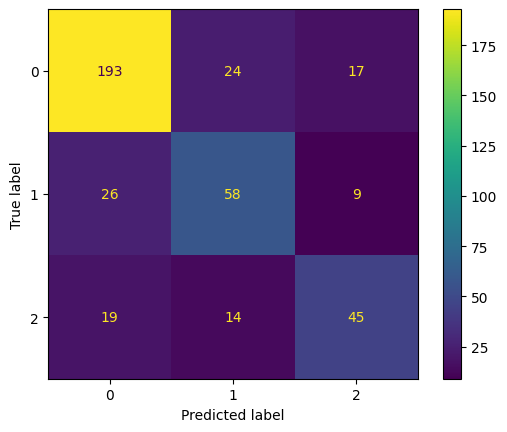

CSV file 'results_count.csv' created successfully.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

results = []

for classifier_name, classifier in classifiers.items():

  print(f'\nClassifier: {classifier_name}')

  classifier.fit(X_train, train_labels)

  y_pred = classifier.predict(X_test)

  report = classification_report(test_labels, y_pred, output_dict=True)

  print(report)

  """
  Gerar os resultados do classification_report para cada um dos 10 algoritmos.
  Montar uma planilha com os resultados das medidas (Acurácia e weighted avg
  da Precisão, Cobertura e F1-Score).
  Destacar em negrito o melhor algoritmo para cada medida de avaliação.
  """

  overall_accuracy = report['accuracy']
  precision = report['weighted avg']['precision']
  recall = report['weighted avg']['recall']
  f1_score = report['weighted avg']['f1-score']

  # Append the metrics to the list
  results.append([classifier_name, overall_accuracy, precision, recall, f1_score])

  ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

  plt.show()

  # Extract the desired metrics from the classification report



# Create a Pandas DataFrame from the results
df_results = pd.DataFrame(results, columns=['Classificador', 'Acurácia', 'Precisão', 'Cobertura', 'Medida-F'])


# Export the DataFrame to a CSV file
df_results.to_csv('results_'+vectorizer_option+'.csv', index=False, encoding='utf-8')

print("CSV file 'results_"+vectorizer_option+".csv' created successfully.")


